# Detection and tracking of moving objects using Background Segmentation

1- Importing opencv, numpy and sys packages.


In [0]:
import cv2
import numpy as np
import sys

2- Loading the video 'M6 Motorway Traffic.mp4' to OpenCV

In [0]:
path = 'M6 Motorway Traffic.mp4'
#cv2.ocl.setUseOpenCL(False)
opencv_ver = cv2.__version__.split('.')[0]
cap = cv2.VideoCapture(path)

3- Background segmentation using OpenCV function 

In [0]:
print(f"Current version of OpenCV is {opencv_ver}")
bg = cv2.createBackgroundSubtractorMOG2()

Current version of OpenCV is 4


4- Now loop each frame. Use a boolean parameter so if there’s nothing wrong this parameter is True otherwise it is False, and this parameter is False the frame will be none.

In [0]:
while (cap.isOpened):
    ret, frame = cap.read()
    if ret:
      #DO SOMETHING
      pass

5- It is time to apply background segmentation in order to separate background and foreground (moving object).

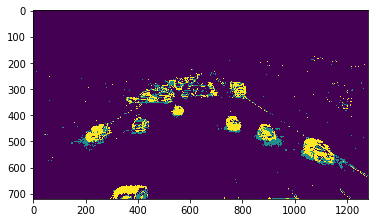

In [0]:
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read()
bgmask = bg.apply(frame)
plt.imshow(bgmask)

6- Applying contours on moving object. Use OpenCV for this task

In [0]:
(contours, hierarchy) = cv2.findContours(bgmask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

7- Looping each contours, getting bounding box from contour and then drawing bounding box.


In [0]:
for c in contours:
    if cv2.contourArea(c) < 800:
        continue
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

8- Showing the result and adding exit key.


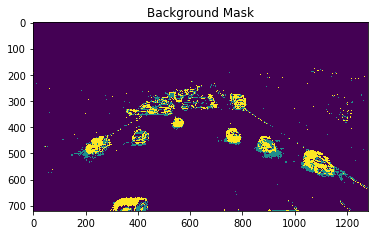

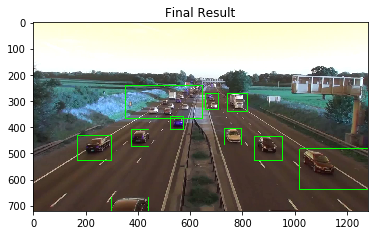

In [0]:
plt.imshow(bgmask)
plt.title("Background Mask")
plt.show()
plt.imshow(frame)
plt.title("Final Result")
plt.show()
cap.release()
cv2.destroyAllWindows()

9- After we are done with capturing and processing the video frame by frame, our next step would be to save the video.

In [0]:
## Applying the processing on video
cap.release()
cap = cv2.VideoCapture(path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
while (cap.isOpened):
    ret, frame = cap.read()
    if ret:
      bgmask = bg.apply(frame)
      (contours, hierarchy) = cv2.findContours(bgmask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      for c in contours:
        if cv2.contourArea(c) < 800:
            continue
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    out.write(frame)
    

cap.release()
out.release()